In [1]:
# Task1_a
from scipy.spatial import distance # for euclidian distance
from scipy.spatial.distance import cityblock # For Manhattan distance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv(r'DS1_C9_S5_Practice_Diabetes_Data.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
# Task1_b
df.value_counts

<bound method DataFrame.value_counts of      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0

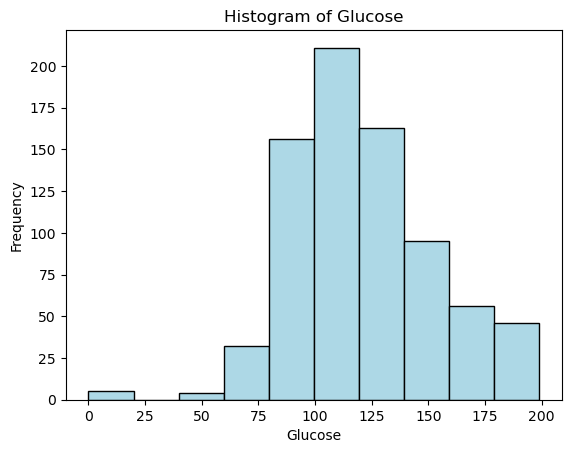

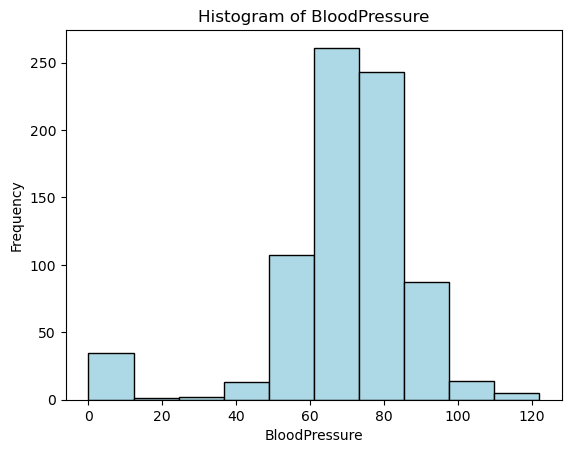

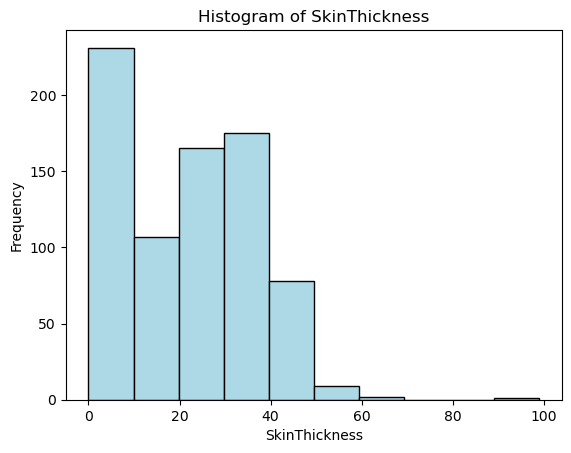

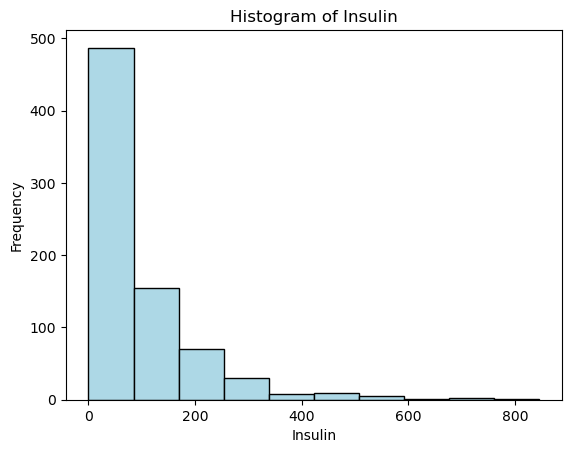

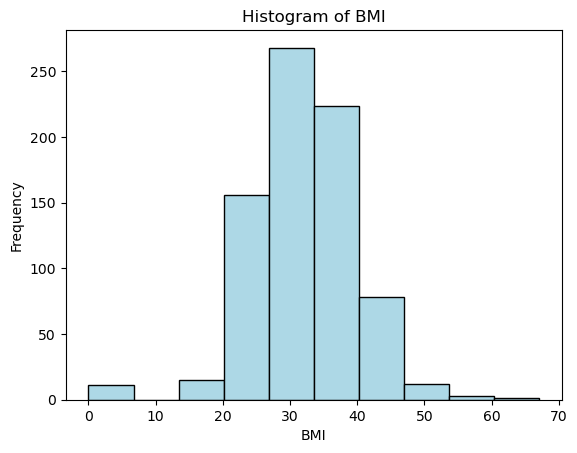

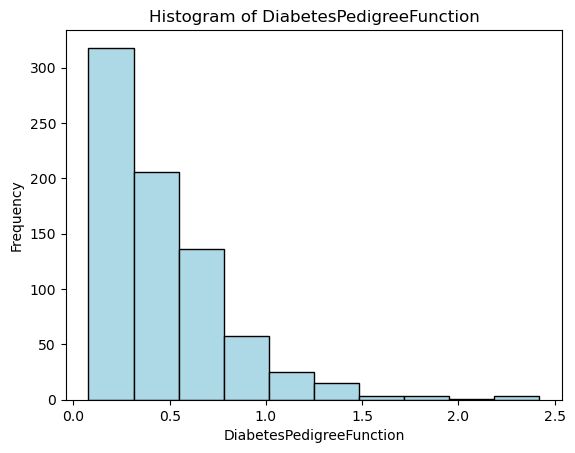

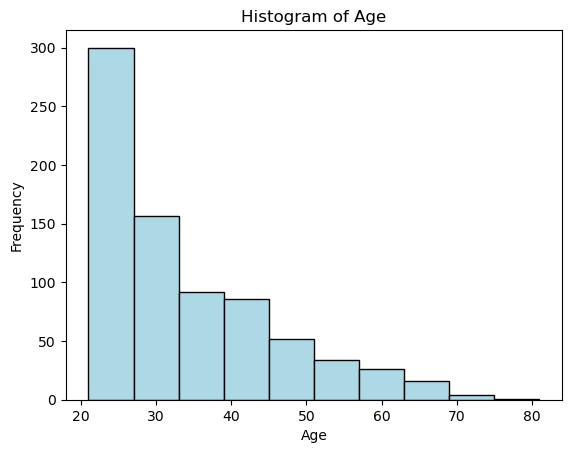

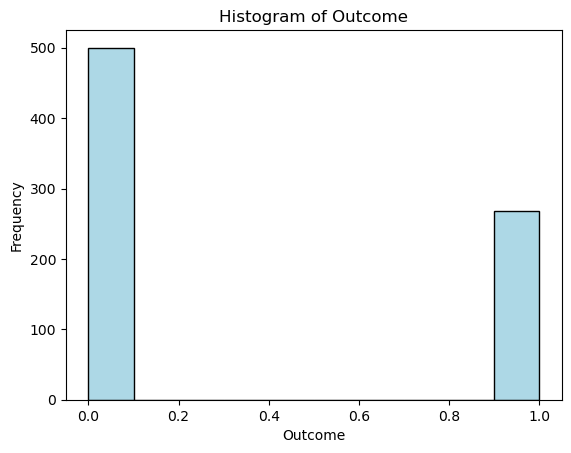

In [4]:
# TASK1_C
# Plot histograms only for numerical columns
for col in df.select_dtypes(include=['number']).columns:
    plt.hist(df[col], bins=10, color="lightblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [5]:
# Task2_1
df.dtypes

Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df_x = df.drop(["Outcome"],axis = 1)
df_x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
def myscaling():
    mydatatype = ["int16", "int32","int64","float16","float32","float64"] # creating new table of this datatype
    new_loan_df = df_x.select_dtypes(include = mydatatype) # creating numpyarray for standardscalers
    scaler = StandardScaler() # creating an object for StandardScaler
    df_scaled = pd.DataFrame(scaler.fit_transform(new_loan_df.to_numpy()), columns = new_loan_df.columns) # scaling, conevrting back into table, if we use reshape then we are concerting column by column
    # Dataframe id converted into numpy
    # Numpy is scaled 
    # Scaled data is converted back to dataframe
    return df_scaled

In [9]:
df_scaled = myscaling()
df_scaled

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [10]:
y = df["Outcome"]

In [11]:
concat = pd.concat([df_scaled,y],axis = 1)
concat

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...
763,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [24]:
no_outlier = df_scaled.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [26]:
for col in df_scaled.columns:
    outlier_cleanup(col)

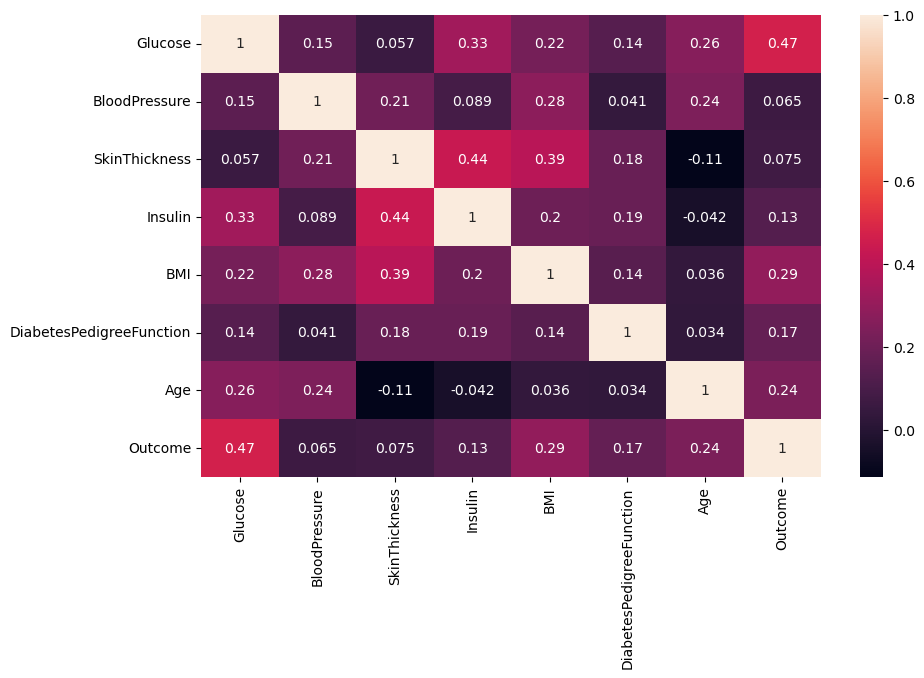

In [32]:
import seaborn as sns
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(concat.corr(),annot = True)
plt.show()

In [300]:
x = no_outlier[['Glucose','BMI','DiabetesPedigreeFunction']].to_numpy().reshape(-1,3)
x

array([[ 0.84832379,  0.20401277,  0.46849198],
       [-1.12339636, -0.68442195, -0.36506078],
       [ 1.94372388, -1.10325546,  0.60439732],
       ...,
       [ 0.00330087, -0.73518964, -0.68519336],
       [ 0.1597866 , -0.24020459, -0.37110101],
       [-0.8730192 , -0.20212881, -0.47378505]])

In [178]:
y = np.array(concat['Outcome']).reshape(-1,1)

In [302]:
# Task2_b
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size = 0.8,random_state = 42)
print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)

(614, 3)
(614, 1)
(154, 3)
(154, 1)


In [228]:
n = int(round(len(x_tr)**0.5,0))
n

25

In [304]:
# Task3_a
acc = []
k_values = np.arange(2,40,4)
for myk2 in k_values:
    temp = KNeighborsClassifier(myk2)
    temp.fit(x_tr,y_tr)
    y_pr = temp.predict(x_te)
    acc.append(accuracy_score(y_te,y_pr))
print(acc)
print(k_values)

[0.7467532467532467, 0.7662337662337663, 0.7857142857142857, 0.7857142857142857, 0.7792207792207793, 0.7922077922077922, 0.7922077922077922, 0.7922077922077922, 0.7987012987012987, 0.7857142857142857]
[ 2  6 10 14 18 22 26 30 34 38]


C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

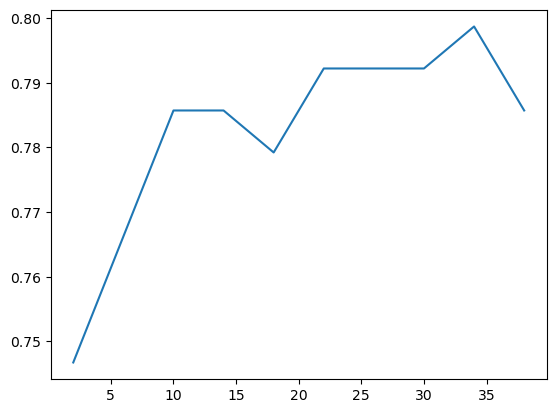

In [306]:
plt.plot(k_values, acc)

In [308]:
# Task3_b & 3_c
final_model = KNeighborsClassifier(32)

final_model.fit(x_tr,y_tr)
print(final_model.score(x_tr,y_tr)) # Training model performance
y_pred = final_model.predict(x_te)
print(accuracy_score(y_te,y_pred)) # Testing model performance

0.7654723127035831
0.7987012987012987


C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Training model performance is 79% , testing model performance is 74% with k-value 35

In [310]:
# F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_te, y_pred)
f1

0.6990291262135923

In [ ]:
# Training score - 76%
# Testing score - 79%
# F1 score - 69%
# its a bad model as getting only 69%